# Brevissima overview delle distribuzioni e commenti tecnici

Nella cartella ci sono 4 file di testo:
* RUN1252.txt è la run di reference
* RUN1253.txt è la run compatibile con il reference
* RUN1265.txt ha la coda destra un po' anomala 
* RUN1242.txt è terribile


Ho preso 200'000 eventi dalla reference run (1252) per costruire il reference sample.

Per il tuning della rete ho costruito 400 data samples da 3'000 eventi della reference run (1252) ciascuno (!! non mi
sono preoccupato di evitare ripetizioni !!).

Per testare le performace dell'algoritmo ho preso 3'000 eventi dalle altre run a disposizione e ho costruito i 3 diversi
data samples da confrontare con il reference.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

## Lettura dei file di testo

In [2]:
class Run:
    
    def __init__(self, run_number: int):
        
        input_path = "./data/"
        self.input_file = input_path + f'RUN{run_number}.txt'
    
    @property
    def data_file(self):
        return self.input_file

In [3]:
run_1252 = Run(run_number=1252) # REFERENCE RUN
run_1253 = Run(run_number=1253) # GOOD RUN
run_1265 = Run(run_number=1265) # BAD RUN
run_1242 = Run(run_number=1242) # TERRIBLE RUN

df_1252 = pd.read_csv(run_1252.data_file)
df_1253 = pd.read_csv(run_1253.data_file)
df_1265 = pd.read_csv(run_1265.data_file)
df_1242 = pd.read_csv(run_1242.data_file)

## Grafici di confronto

Notare che in questo notebook plotto le run intere, non il reference da 200k eventi e i data samples da 3k eventi.

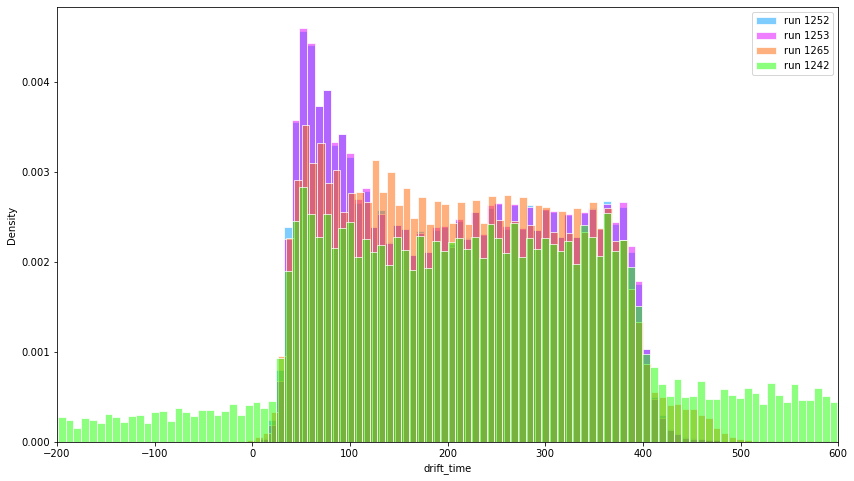

In [4]:
colors=["#009cff", "#e200ff", "#ff6300", "#1dff00", "#FFFFFF"]
labels=["run 1252", "run 1253", "run 1265", "run 1242"]
data = [df_1252, df_1253, df_1265, df_1242]

left_bound = -200
right_bound = 600

fig, ax = plt.subplots(figsize=(14,8))

for i, df in enumerate(data):

    sns.histplot(
        x=df["drift_time"],
        bins=100,
        stat="density",
        element='bars',
        fill=True,
        color=colors[i],
        edgecolor=colors[-1],
        alpha=0.5,
        label=labels[i]
    )
    
ax.set_xlim(left_bound, right_bound)
ax.legend()
plt.show()

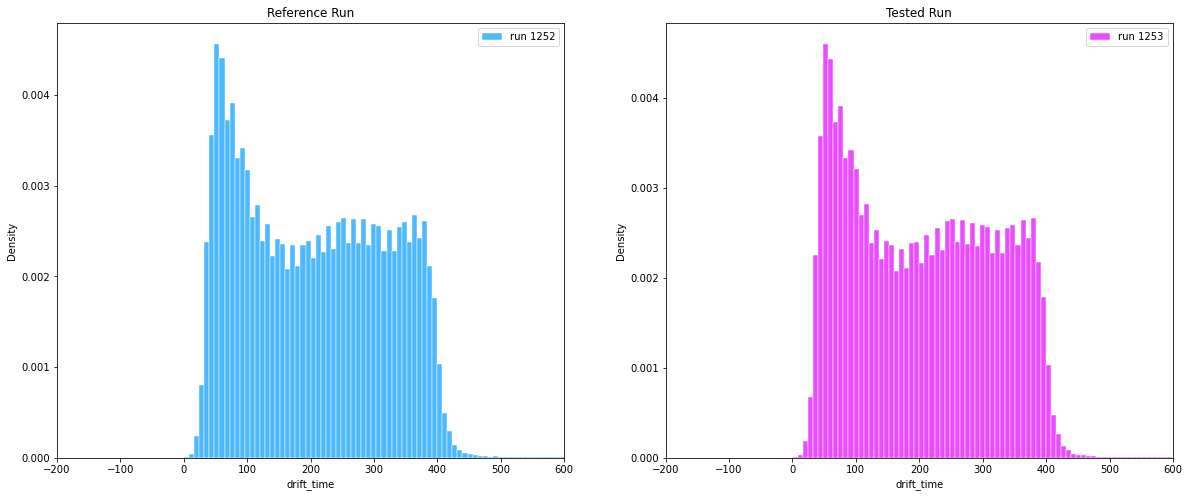

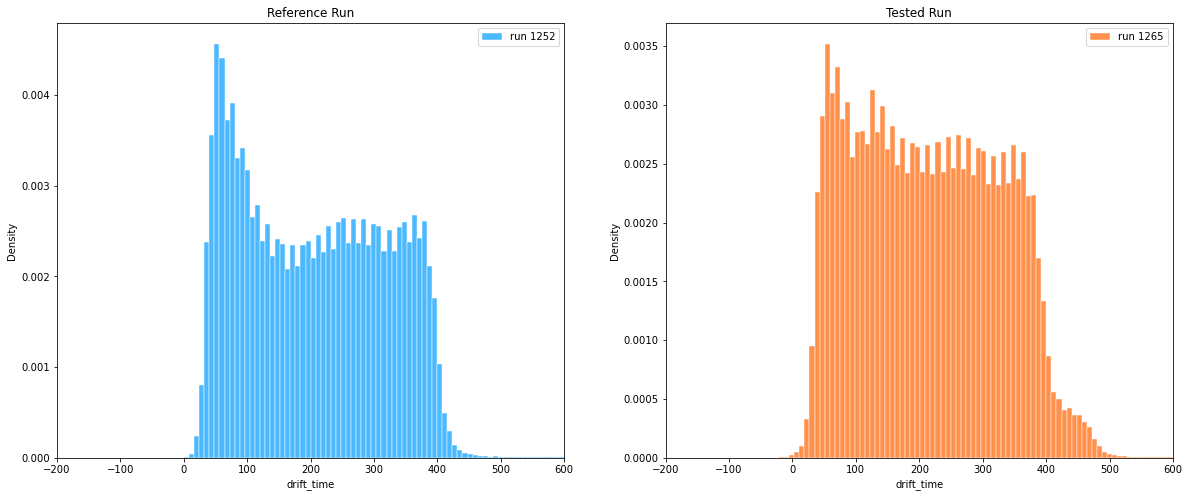

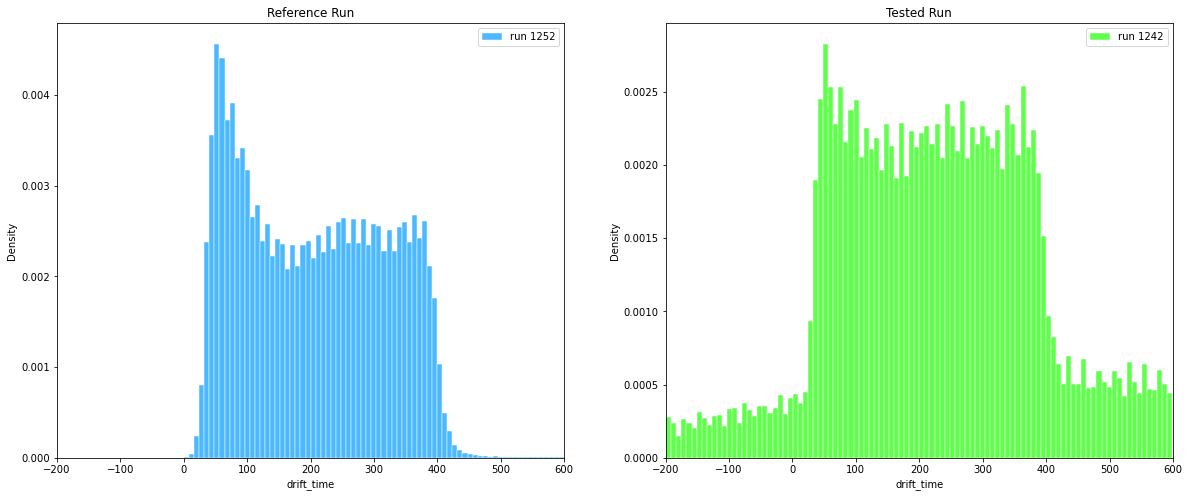

In [5]:
colors=["#009cff", "#e200ff", "#ff6300", "#1dff00", "#FFFFFF"]
labels=["run 1252", "run 1253", "run 1265", "run 1242"]
data = [df_1252, df_1253, df_1265, df_1242]

left_bound = -200
right_bound = 600



for i in range(1, len(data)):
    
    fig, ax = plt.subplots(ncols=2, figsize=(20,8))

    sns.histplot(
        x=data[0]["drift_time"],
        bins=100,
        stat="density",
        element='bars',
        fill=True,
        color=colors[0],
        edgecolor=colors[-1],
        alpha=0.7,
        label=labels[0],
        ax=ax[0]
    )
    sns.histplot(
        x=data[i]["drift_time"],
        bins=100,
        stat="density",
        element='bars',
        fill=True,
        color=colors[i],
        edgecolor=colors[-1],
        alpha=0.7,
        label=labels[i],
        ax=ax[1]
    )
    ax[0].set_title("Reference Run")
    ax[0].set_xlim(left_bound, right_bound)
    ax[0].legend()
    ax[1].set_title("Tested Run")
    ax[1].set_xlim(left_bound, right_bound)
    ax[1].legend()
    
plt.show()

## Standardization

Prima di fornire i dati all'algoritmo ho effettuato una normalizzazione sottraendo a ciascun campione la sua media e
dividendolo poi per la sua deviazione standard.

In [6]:
norm_data = []
for df in data:
    mean = np.mean(df)
    std = np.std(df)
    norm_data.append( (df - mean) / std )

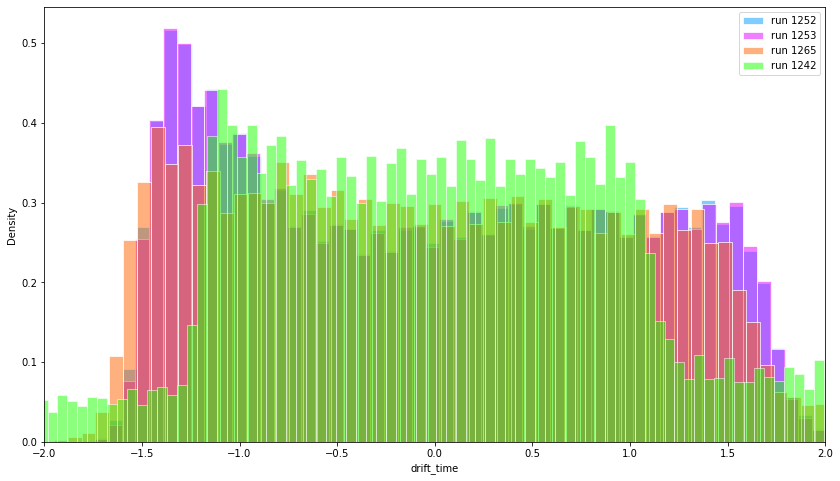

In [7]:
colors=["#009cff", "#e200ff", "#ff6300", "#1dff00", "#FFFFFF"]
labels=["run 1252", "run 1253", "run 1265", "run 1242"]

left_bound = -2
right_bound = 2

fig, ax = plt.subplots(figsize=(14,8))

for i, df in enumerate(norm_data):

    sns.histplot(
        x=df["drift_time"],
        bins=100,
        stat="density",
        element='bars',
        fill=True,
        color=colors[i],
        edgecolor=colors[-1],
        alpha=0.5,
        label=labels[i]
    )
    
ax.set_xlim(left_bound, right_bound)
ax.legend()
plt.show()

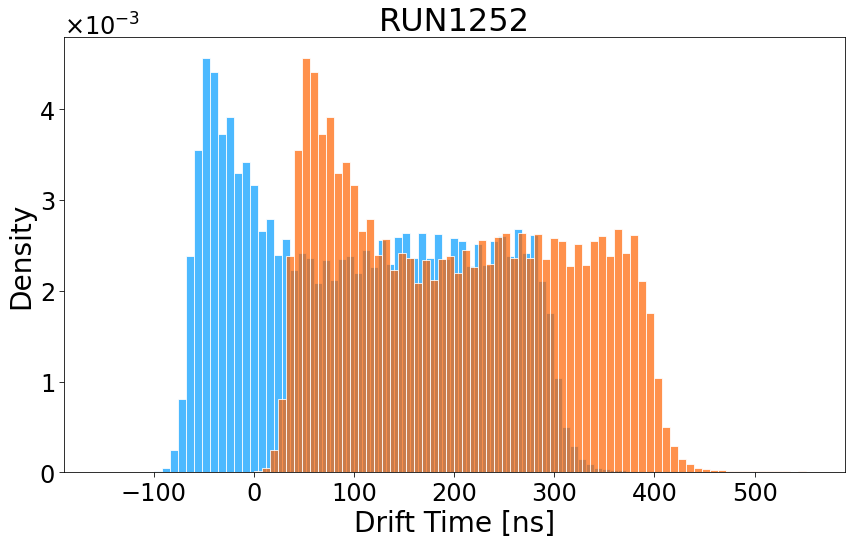

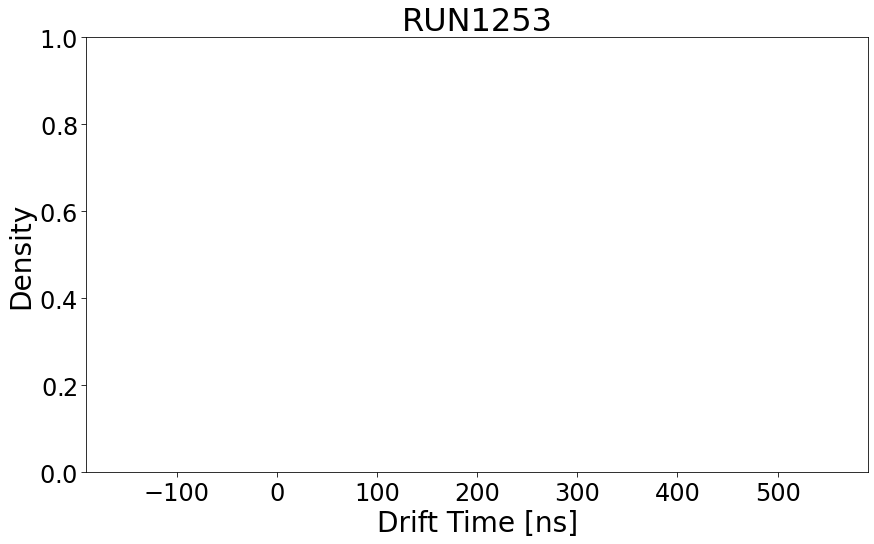

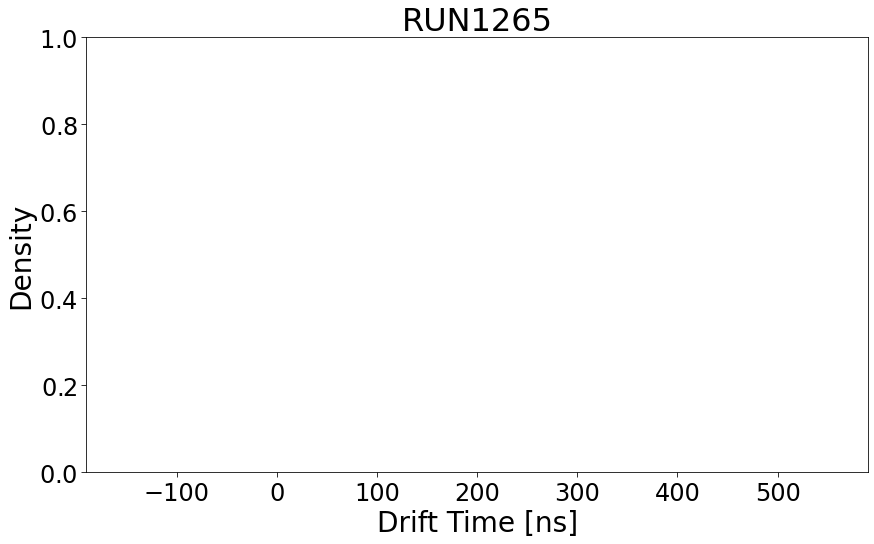

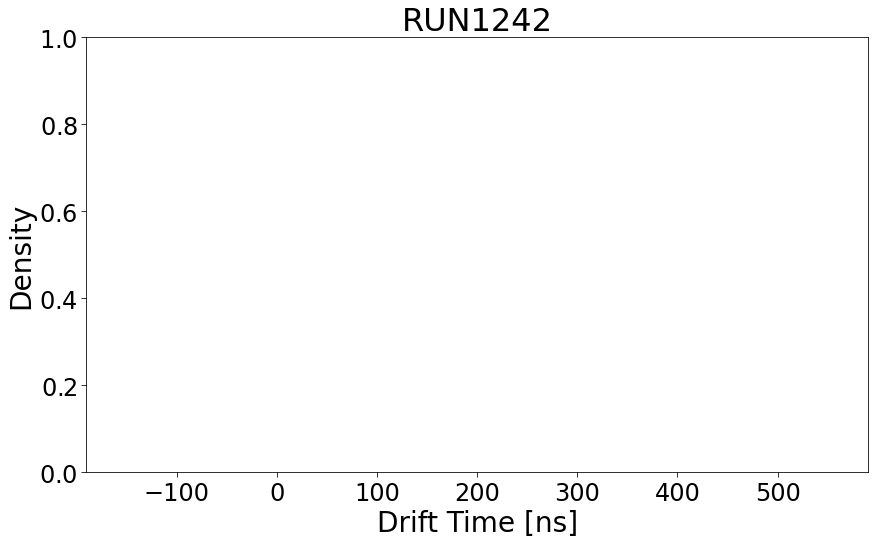

In [16]:
colors=["#009cff", "#e200ff", "#ff6300", "#1dff00", "#FFFFFF"]
labels=["run 1252", "run 1253", "run 1265", "run 1242"]
data = [df_1252, df_1253, df_1265, df_1242]
titles = ["RUN1252", "RUN1253", "RUN1265", "RUN1242"]

left_bound = -200
right_bound = 600

for i, df in enumerate(data):
    fig, ax = plt.subplots(figsize=(14,8))
    
    ax.set_title(f"{titles[i]}", fontsize=32)
    ax.set_xlabel('Drift Time [ns]', fontsize = 28)
    ax.set_ylabel('Density', fontsize = 28)

    ax.tick_params(axis = 'both', which = 'major', labelsize = 24, direction = 'out', length = 5)
    ax.yaxis.get_offset_text().set_fontsize(24)
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = (0,0))
    
    ax.set_xlim(left_bound+10, right_bound-10)
    
    sns.histplot(
        x=df["drift_time"],
        bins=100,
        stat="density",
        element='bars',
        fill=True,
        color=colors[0],
        edgecolor=colors[-1],
        alpha=1,
        label=labels[i]
    )
    
    fig.savefig(f'../THESIS/Images/experiment/{titles[i]}.pdf', facecolor = 'white')
    
plt.show()

In [6]:
def change_legend(ax, new_loc, fontsize, titlesize, **kws):
        '''funzione per modificare posizione e font size della legenda generata da seaborn'''

        old_legend = ax.legend_
        handles = old_legend.legendHandles
        labels = [t.get_text() for t in old_legend.get_texts()]
        title = old_legend.get_title().get_text()

        ax.legend(handles, labels, loc=new_loc, title=title, fontsize=fontsize, title_fontsize=titlesize, frameon = True, fancybox = False, framealpha = 0.5, **kws)

        return

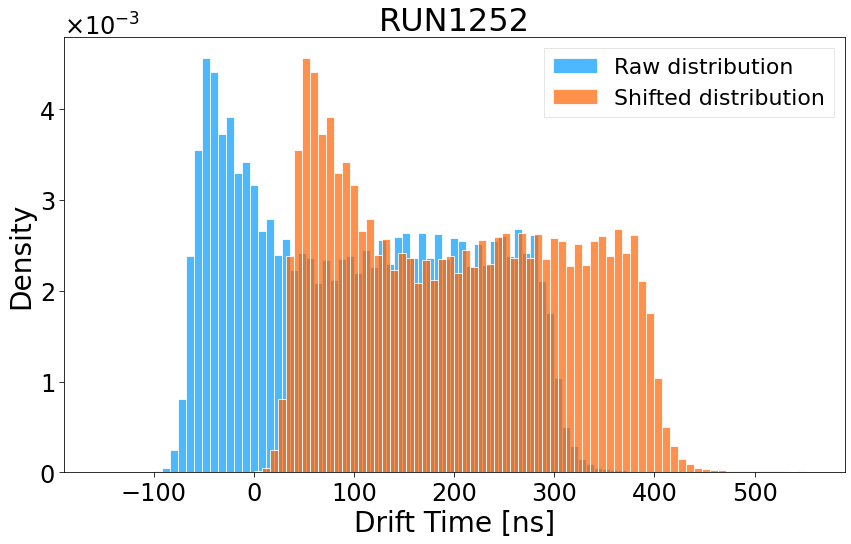

In [25]:
colors=["#009cff", "#e200ff", "#ff6300", "#1dff00", "#FFFFFF"]
labels=["run 1252", "run 1253", "run 1265", "run 1242"]
data = [df_1252, df_1253, df_1265, df_1242]
titles = ["RUN1252", "RUN1253", "RUN1265", "RUN1242"]

left_bound = -200
right_bound = 600

df = data[0]

fig, ax = plt.subplots(figsize=(14,8))

ax.set_title(f"{titles[0]}", fontsize=32)
ax.set_xlabel('Drift Time [ns]', fontsize = 28)
ax.set_ylabel('Density', fontsize = 28)
ax.tick_params(axis = 'both', which = 'major', labelsize = 24, direction = 'out', length = 5)
ax.yaxis.get_offset_text().set_fontsize(24)
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = (0,0))

ax.set_xlim(left_bound+10, right_bound-10)

df_raw = df["drift_time"] - 100
sns.histplot(
    x=df_raw,
    bins=100,
    stat="density",
    element='bars',
    fill=True,
    color=colors[0],
    edgecolor=colors[-1],
    alpha=0.7,
    label="Raw distribution"
)
sns.histplot(
    x=df["drift_time"],
    bins=100,
    stat="density",
    element='bars',
    fill=True,
    color=colors[2],
    edgecolor=colors[-1],
    alpha=0.7,
    label="Shifted distribution"
)

ax.legend()
change_legend(ax=ax, new_loc="upper right", fontsize=22, titlesize=0)

fig.savefig('../THESIS/Images/experiment/RUN1252_both.pdf', facecolor='white')
plt.show()

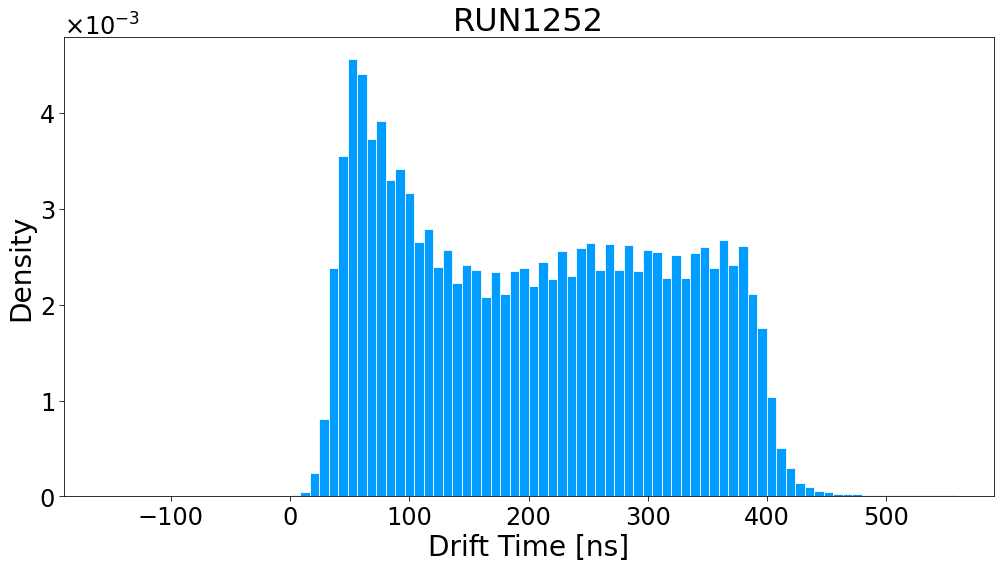

In [13]:
colors=["#009cff", "#e200ff", "#ff6300", "#1dff00", "#FFFFFF"]
labels=["run 1252", "run 1253", "run 1265", "run 1242"]
data = [df_1252, df_1253, df_1265, df_1242]
titles = ["RUN1252", "RUN1253", "RUN1265", "RUN1242"]

color=colors[0]

left_bound = -200
right_bound = 600

df = data[0]#.sample(n=200000)

fig, ax = plt.subplots(figsize=(14,8))

ax.set_title(f"{titles[0]}", fontsize=32)
ax.set_xlabel('Drift Time [ns]', fontsize = 28)
ax.set_ylabel('Density', fontsize = 28)
ax.tick_params(axis = 'both', which = 'major', labelsize = 24, direction = 'out', length = 5)
ax.yaxis.get_offset_text().set_fontsize(24)
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = (0,0))

ax.set_xlim(left_bound+10, right_bound-10)

sns.histplot(
    x=df["drift_time"],
    bins=100,
    stat="density",
    element='bars',
    fill=True,
    color=colors[0],
    edgecolor=colors[-1],
    alpha=1,
)
fig.tight_layout()
fig.savefig('../SLIDES_THESIS/Images/reference_blue.pdf', facecolor='white')
plt.show()

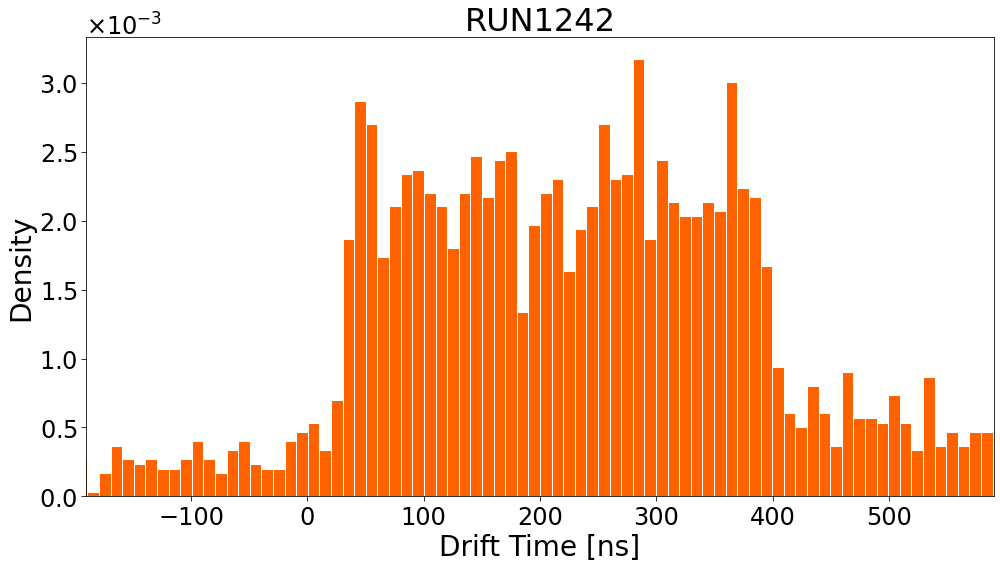

In [14]:
colors=["#009cff", "#e200ff", "#ff6300", "#1dff00", "#FFFFFF"]
labels=["run 1252", "run 1253", "run 1265", "run 1242"]
data = [df_1252, df_1253, df_1265, df_1242]
titles = ["RUN1252", "RUN1253", "RUN1265", "RUN1242"]

color=colors[2]

left_bound = -200
right_bound = 600

df = data[3].sample(n=3000)

fig, ax = plt.subplots(figsize=(14,8))

ax.set_title(f"{titles[3]}", fontsize=32)
ax.set_xlabel('Drift Time [ns]', fontsize = 28)
ax.set_ylabel('Density', fontsize = 28)
ax.tick_params(axis = 'both', which = 'major', labelsize = 24, direction = 'out', length = 5)
ax.yaxis.get_offset_text().set_fontsize(24)
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = (0,0))

ax.set_xlim(left_bound+10, right_bound-10)

sns.histplot(
    x=df["drift_time"],
    bins=80,
    stat="density",
    element='bars',
    fill=True,
    color=color,
    edgecolor=colors[-1],
    alpha=1,
)
fig.tight_layout()
fig.savefig('../SLIDES_THESIS/Images/sampled_1242.pdf', facecolor='white')
plt.show()